# Homework #9

**See Canvas for the HW #9 assignment and due date. This assignment is optional**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## A. Theoretical Problems

## A.1 [8 points] Gamma/Exponential

**Let $X_1,...,X_n \overset{iid}{\sim} Exp(\lambda)$, and let the prior distribution on $\lambda$ be given by $\lambda \sim \Gamma(\alpha, \beta)$. Find the posterior distribution of $\lambda$ given the data.**

(HINT: You can just compute the numerator of Bayes' theorem, and notice that the form of the result, up to a constant (with respect to $\lambda$) takes a known pdf form.)

Note: 

The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" [parameterization](https://en.wikipedia.org/wiki/Gamma_distribution): If $Y \sim \Gamma(\alpha, \beta)$ then the pdf of $Y$ is given by 

\begin{align*}
f(y \, | \, \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}y^{\alpha -1}e^{-\beta y}, \,\,\,\,\, y >0, \,\, \alpha > 0, \,\, \beta >0.
\end{align*}

Above, $\Gamma(\alpha)$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function) of $\alpha$. In the Gamma distribution, $\Gamma(\alpha)$ is just a normalizing constant, and so you do not need to compute it explicitly (just leave it as $\Gamma(\alpha)$).

Note that the prior distribution function is given by 

\begin{align*}
\pi(\lambda) =  \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha -1}e^{-\beta \lambda}, \,\,\,\,\, \lambda >0, \,\, \alpha > 0, \,\, \beta >0,
\end{align*}

and the likliehood is given by

\begin{align*}
f(\mathbf{x} \, | \, \alpha, \beta) = \lambda^ne^{-\lambda n \bar{x}}
\end{align*}

Thus, for prior $\pi(\lambda)$, the posterior is given, up to a normalizing constant, by:

\begin{align*}
\pi(\lambda \, | \, \mathbf{x}) &\propto f(\mathbf{x} \, | \, \alpha, \beta)\pi(\lambda) = \left(\lambda^ne^{-\lambda n \bar{x}}\right)\left(\frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha -1}e^{-\beta \lambda}\right) \\
&\propto \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{n + \alpha -1}e^{-(n\bar{x} + \beta)\lambda}
\end{align*}

Up to a normalizing constant, this is a Gamma distribution. Thus, $\lambda \, | \, \mathbf{x} \sim \Gamma(n + \alpha, \, n\bar{x} + \beta)$

## B. Computational Problems

## B.1 Poisson inference

Suppose that the number of species discovered each year is thought to be Poission distributed with rate parameter $\lambda$; that is, for year $t$, $X_t \, | \, \lambda \overset{iid}{\sim} Poisson(\lambda)$. We can use Bayesian inference with real data, $\mathbf{x}$, to estimate the true $\lambda$. Suppose that our prior distribution on $\lambda$ is uniform between $0$ and $100$; that is, $\lambda \sim U(0,100)$. Further, suppose that, from 2010 to 2015, the number of new species discovered per year (in ascending order) is recorded as $\mathbf{x} = (64,13,33,18,30,20)$. Our goal in this problem will be to plot the posterior distribution of $\lambda \, | \, \mathbf{x}$.

**B.1(a) [2 points] First, construct a grid of $m =500$ values for $\lambda$ between $0$ and $100$. Then, compute the prior density at each value of $\lambda$, (denoated $\pi(\lambda)$).**

In [4]:
lambda = seq(0,100,length.out = 500); length(lambda)
prior = dunif(lambda, 0, 100)

[1] 500

**B.1(b) [5 points] Then, construct the likelihood function for `x = c(64,13,33,18,30,20)` (denoted $f(\mathbf{x} \, | \, \lambda)$ ). Remember, since our data are iid, the likelihood function is the product of the marginal pmfs, with the data fixed at $x$, and with $\lambda$ as a variable.**

HINT: You can start with `likelihood = 1`. Then write a loop over `t = 1:6`, where, on each iteration, you multiply `likelihood` by the pmf of the Poisson for the $t^{th}$ data point given $\lambda $ (for the `lambda` constructed in B.1(a)).

In [5]:
x = c(64,13,33,18,30,20)
likelihood = 1
for(t in 1:6){likelihood=likelihood*dpois(x[t],lambda)}


**B.1(c) [6 points] Compute and plot the posterior distribution of $\lambda \, | \, \mathbf{x}$. Comment on the shape of the distribution.**

Here, the posterior distribution, denoted $\pi(\lambda \, | \, \mathbf{x} )$, is given by

\begin{align*}
\pi(\lambda \, | \, \mathbf{x} ) = \frac{f(\mathbf{x} \, | \, \lambda )\pi(\lambda) }{\sum^{500}_{i = 1}f(\mathbf{x} \, | \, \lambda_i )\pi(\lambda_i)},
\end{align*}

where $\displaystyle\sum^{500}_{i = 1}f(\mathbf{x} \, | \, \lambda_i )\pi(\lambda_i)$ is the sum of the likelihood times the prior over all values of $\lambda$ in `lambda` from part B.1(a).

[1] 1

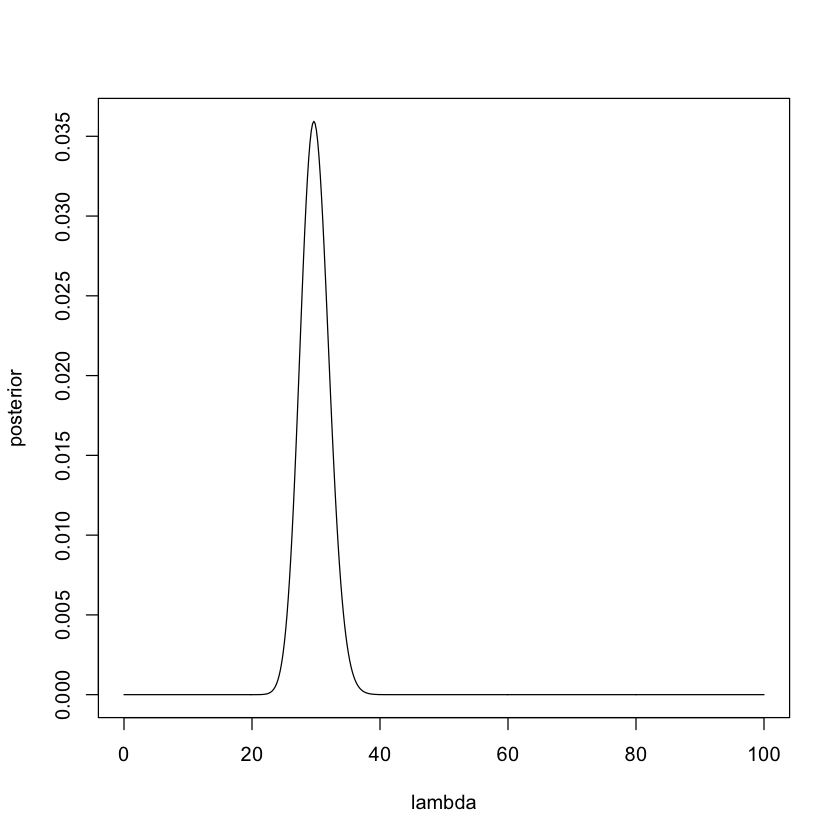

In [6]:
posterior = likelihood*prior/sum(likelihood*prior); sum(posterior)
plot(lambda, posterior, type = "l")

It looks relatively normal, centered arounc $30$.

# B.2 Maximum likelihood vs Bayesian inference

Imagine that, before class, I rolled a six-sided die and secretly recorded the outcome; this number is the target, $T$. Your goal in this problem is to guess $T$. 

There’s some evidence to take into account, however. Imagine that, after setting $T$, I roll the same six-sided die $10$ times. I don’t let you see how it lands, but each time I tell you (accurately) whether the number you just rolled was greater than, equal to, or less than $T$. After $10$ trials, you must guess what the target is. Here is the outcome of those $10$ trials:

$\mathbf{x} = (G, G, G, E, L, G, L, E, G, E)$

where 
- $G$ = the roll was greater than $T$
- $L$ = the roll was less than $T$, and 
- $E$ = the roll was equal to $T$.

Let's use Bayes' theorem to come up with a strategy for guessing $T$.

Bayes' theorem tells us that, for $t = 1,...,6$:

\begin{align*}
P(T = t \, | \, \mathbf{x}) = \frac{P(\mathbf{x} \, | \, T = t)P(T=t)}{P(\mathbf{x})}  = \frac{P(\mathbf{x} \, | \, T = t)P(T=t)}{\sum^6_{t=1} P(\mathbf{x} \, | \, T = t)P(T=t)},
\end{align*}

where 

- $P(\mathbf{x} \, | \, T = t)$ is the *likelihood function* of the data conditioned on $T = t$.

- $P(T=t)$ is the *prior distribution* on $T=t$. Because I rolled the die in my office, the probability that $T=t$ for $t = 1,...,6$ is $P(T=t) = 1/6$. 

- $P(\mathbf{x}) = \sum^6_{t=1} P(\mathbf{x} \, | \, T = t)P(T=t)$ is the probability of the *evidence*. The equality is given by the Law of Total Probability. 

- $P(T = t \, | \, \mathbf{x})$ is the *posterior probability* of $T = t$ given the observations $\mathbf{x}$.

In order to compute the likelihood function for a given $T=t$, we'll need to calculate the probabilities of being less than ($p_l$), equal to ($p_e$), or greater than ($p_g$), $T = t$. 

For example, if $T = 1$, then $p_l = 0$ because it is not possible to roll less than a $1$. $p_e = 1/6$, because that's the probability of rolling a $1$. And $p_g = 5*(1/6) = 5/6$, because rolling greater than $1$ means rolling a $2$ **or** a $3$ **or** ... a $6$. The word **or** suggests summing each of the probabilities, and since each face has probability $1/6$, we multiply by $5$.

**B.2(a) [6 points] Write down general formula for $P(l \, | \, T = t)$, $P(e \, | \, T = t)$, and $P(g \, | \, T = t)$. This question is asking for a mathematical expression, not R code.**

The reasoning above suggests a general formula: for $t = 1,...,6$:

\begin{align*}
P(l \, | \, T = t) &= (t-1)\frac{1}{6} \\
P(e \, | \, T = t) &= \frac{1}{6} \\
P(g \, | \, T = t) &= (6-t)\frac{1}{6}
\end{align*}

The cell below is an R function that takes in $T$ and calculates these probabilities.

**B.2(b) [3 points] Now, write an R function, called `p`, that takes in a value of $T$ and returns $P(l \, | \, T = t)$, $P(e \, | \, T = t)$, and $P(g \, | \, T = t)$.**

In [7]:
p = function(T){
    p_l = (1/6)*(T-1); p_e = 1/6; p_g = (1/6)*(6-T)
    p = c(p_l, p_e, p_g)
    return(p)
}

Next, calculate the likelihood function for a given $T=t$ together (we don't quite know how to do this on our own...yet).

Note that all of our rolls are independent, so the likelihood function - which is a joint probability density function (pdf) of the data given $T = t$ - is the product of the marginal pdfs, interpreted as a function of $t$.

**B.2(c) [4 points] Write down the likelihood function for our data, $\mathbf{x}$, given above in the problem description.**

For our $\mathbf{x} = (G, G, G, E, L, G, L, E, G, E)$, the likelihood is:

$$P(\mathbf{x} \, | \, T = t ) = \left[P(g \, | \, T = t)\right]^3P(e \, | \, T = t)P(l \, | \, T = t)P(g \, | \, T = t)P(l \, | \, T = t)P(e \, | \, T = t)P(g \, | \, T = t)P(e \, | \, T = t).$$

Here's an R function that computes this likelihood function for a given $T$:

**B.2(d) [4 points] Now, write an R function, called `likelihood`, that takes in a value of $T$ and returns the likelihood function.**

In [8]:
likelihood = function(T){
    pp = p(T) #set the correct probabilities for l, g, and e
    l = pp[3]^3*pp[2]*pp[1]*pp[3]*pp[1]*pp[2]*pp[3]*pp[2]
    return(l)
    }

**B.2(e) [4 points] Now, compute the probability of the data/evidence, $P(\mathbf{x}) = \sum^6_{t=1} P(\mathbf{x} \, | \, T = t)P(T=t)$. (Note that this is tricky in general, since it requires that we change $T$, and thus change $p_l$, $p_e$, and $p_g$. Luckily, we wrote a function to do that above and took it into account in our likelihood function!)**

In [9]:
prior = 1/6

evidence = 1/6*(likelihood(1)+likelihood(2)
            +likelihood(3)+likelihood(4)+likelihood(5)+likelihood(6));

**B.2(f) [7 points] Now we have all of the components for computing the posterior. So, compute the posterior for each $T=t$ and plot it using a bar chart.**

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


side,post_prob
1,0.000000000
2,0.445217391
3,0.422608696
4,0.125217391
5,0.006956522
6,0.000000000


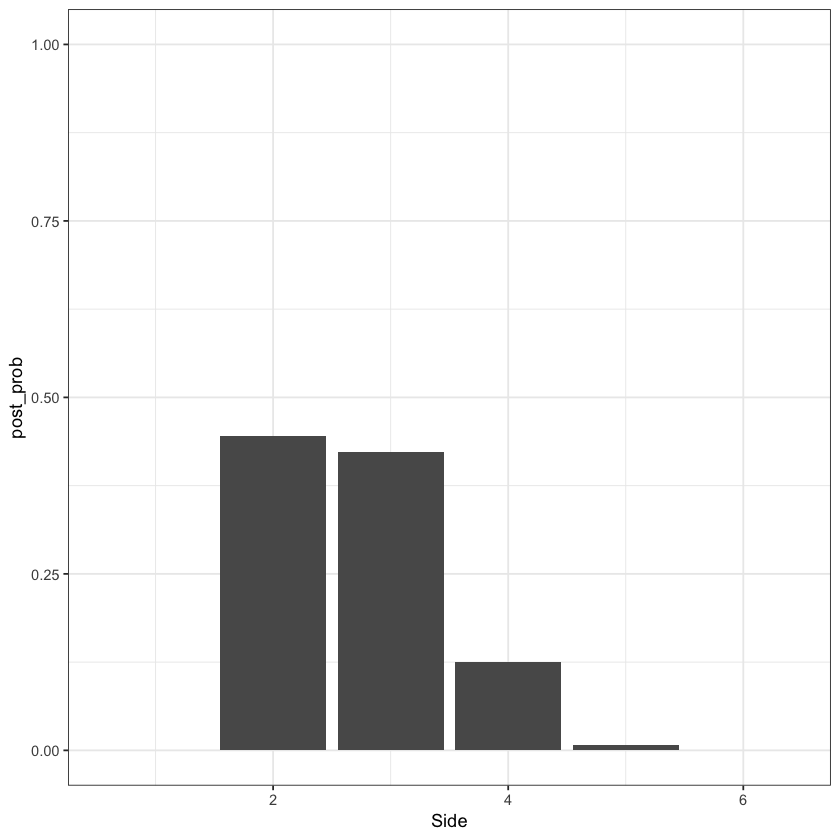

In [10]:
posterior = matrix(NA, nrow = 6)
for (T in 1:6){
    posterior[T] = likelihood(T)*prior/evidence; 
    }

library(ggplot2)

df = data.frame(side = 1:6, post_prob = posterior)
df
ggplot(data=df, aes(x=side, y=post_prob)) +
  geom_bar(stat="identity") + 
    ylim(c(0,1)) + 
    xlab("Side") +
    theme_bw()

**B.2(g) [4 points] Interpret the posterior distribution from the previous part. What value of $T$ would you guess and why? How does did your belief update from your prior?**

Well, we started out with a belief that any value of $T$ was as likely as any other, based on the way fair dice function. Then, we had some evidence, i.e., $\mathbf{x}$. That evidence was relevant, and it changed our probabilities about $T$. It made $2$ most likely, $3$ almost as likely, and $4$ somewhat likely, with $1$, $5%, and $6$ pretty unlikely.


The nice thing about this method is that it not only provides a *guess* for $T$, i.e., $T = 2$, but it also gives a confidence measure, quantified in terms of probabilities. You might say that you are $\approx 45\%$ confident that $T = 2$.

**B.2(h) [6 points] Another strategy, as you know, is maximum likelihood estimation (MLE). MLE says that our best guess about $T$ should be the value of $T$ that maximizes the likelihood function over all values of $T$ ($1,...,6$). Calculate the MLE for the data $\mathbf{x}$. In the first (markdown) cell, give a mathematical description of MLE for this problem. In the second (R) cell, compute the MLE.**


Luckily, we've already found the likelihood function. So MLE is just a matter of computing $P(\mathbf{x} \, ; \, T = t)$ for $t = 1,...,6$, and choosing the "argmax", i.e., the value of $T = t$ that gives the highest probability. We can do this easily in R:

In [11]:
#t = 1
likelihood(1)
#t = 2
likelihood(2)
#t = 3
likelihood(3)
#t = 4 ***
likelihood(4)
#t = 5
likelihood(5)
#t = 6
likelihood(6)


[1] 0

[1] 1.693509e-05

[1] 1.60751e-05

[1] 4.762993e-06

[1] 2.646107e-07

[1] 0

**B.2(i) [7 points] Now change your prior to be `prior = c(1/6, 1/6, 2/6, 1/6,1/6, 0)` and recompute the posterior distribution. Do you have a different guess? What might justify this prior? Can maximum likelihood estimation take into account this kind of adjustment?**

[1] 1

side,post_prob
1,0.000000000
2,0.312958435
3,0.594132029
4,0.088019560
5,0.004889976
6,0.000000000


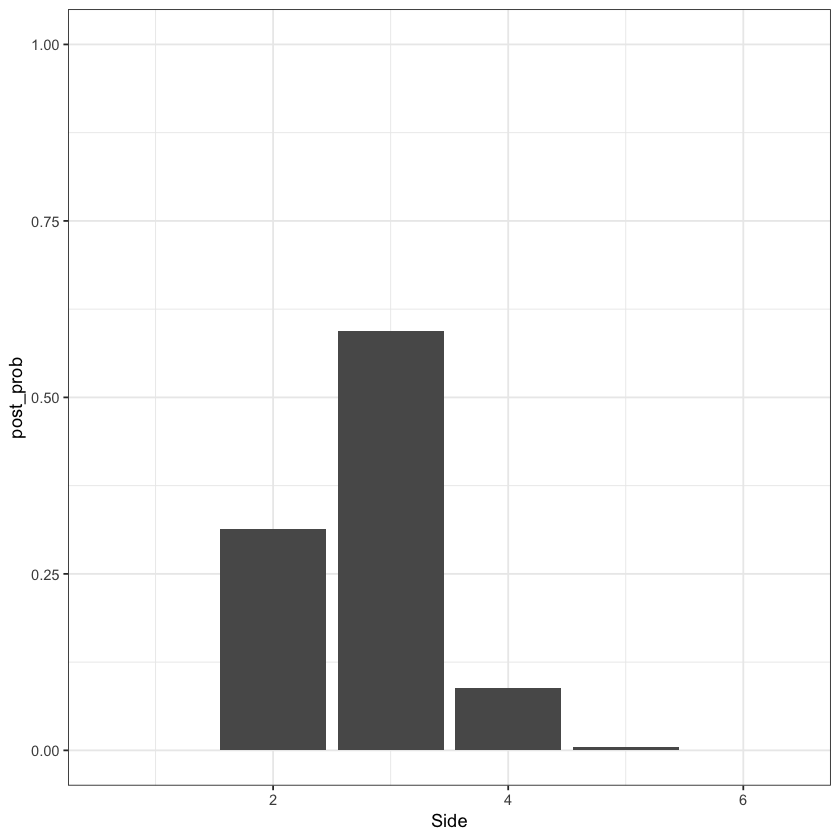

In [12]:
prior = c(1/6, 1/6, 2/6, 1/6,1/6, 0); sum(prior)

evidence = prior[1]*likelihood(1) + prior[2]*likelihood(2)+ prior[3]*likelihood(3) + prior[4]*likelihood(4) + prior[5]*likelihood(5) + prior[6]*likelihood(6)

posterior = matrix(NA, nrow = 6)
for (T in 1:6){
    posterior[T] = likelihood(T)*prior[T]/evidence; 
    }

library(ggplot2)

df = data.frame(side = 1:6, post_prob = posterior)
df
ggplot(data=df, aes(x=side, y=post_prob)) +
  geom_bar(stat="identity") + 
    ylim(c(0,1)) + 
    xlab("Side") +
    theme_bw()

- Our guess is now $T = 3$.
- This prior may be justified, if, for example, we have prior information that $T = 3$ is more likely.
- Maximum likelihood estimation does not formally take into account prior information, so it cannot take into account this adjustment.

## B.3 Normal conjugate example

Suppose Company $A$ is considering using recycled cobalt in the smartphone batteries that it produces. Denote the true mean battery life (run time on a full charge) as $\mu$.  Company $A$ would like to know if there is evidence to strongly suggest that $\mu$ exceeds or falls short of $24$ hours ($24$ hours is the true mean battery life of the battery currently in use). Researchers' prior beliefs about the population mean can be represented by a normal distribution, centered at $\theta = 24$, with variance $\tau^2 = 4$. That is: $\mu \sim N(24, 4)$.

Suppose the researchers at company $A$ tests $n = 25$ randomly selected phones with the recycled cobalt. Denote the battery life of phones in a possible sample as $X_1,...,X_n$. Assume that the standard deviation of times is $\sigma = 1$) For this particular sample, the data $x_1,...,x_n$ were measured as:

\begin{align*}
&25.0, \, 23.8,\, 23.3, \,24.0, \,24.5, \,25.3, \,22.4, \,25.1, \,20.3, \,22.3, \,25.4, \,22.9, \,24.4, \,24.9, \,24.3, \\
&23.0, \,24.7, \,24.7, \,23.5, \,23.9, \,24.7, \,25.4, \,23.9, \,23.1, \,23.0. \\
\end{align*}


In [10]:
x = c(25.0, 23.8, 23.3, 24.0, 24.5, 25.3, 22.4, 25.1, 20.3, 22.3, 25.4, 22.9, 24.4, 24.9, 24.3, 23.0, 24.7, 24.7, 23.5, 23.9, 24.7, 25.4, 23.9, 23.1, 23.0)
mean(x)

[1] 23.912

**B.3(a) [6 points] Compute the posterior distribution mean and variance of $\mu \, | \, \mathbf{x}$ using the conjugate prior result from class. What would be a reasonable point estimate for $\mu$ given the data?**

In [11]:
theta = 24; tau = 2; n = 25; sigma = 1
xbar = mean(x)
post_mu = (n*xbar*sigma^(-2) + theta*tau^(-2))/(n*sigma^(-2) + tau^(-2))

post_sig2 = 1/(n/sigma^2 + 1/tau^2)

post_mu; post_sig2

[1] 23.91287

[1] 0.03960396

**B.3(b) [9 points] On the same plot, plot the prior distribution and posterior distribution. What do you notice about this plot?**

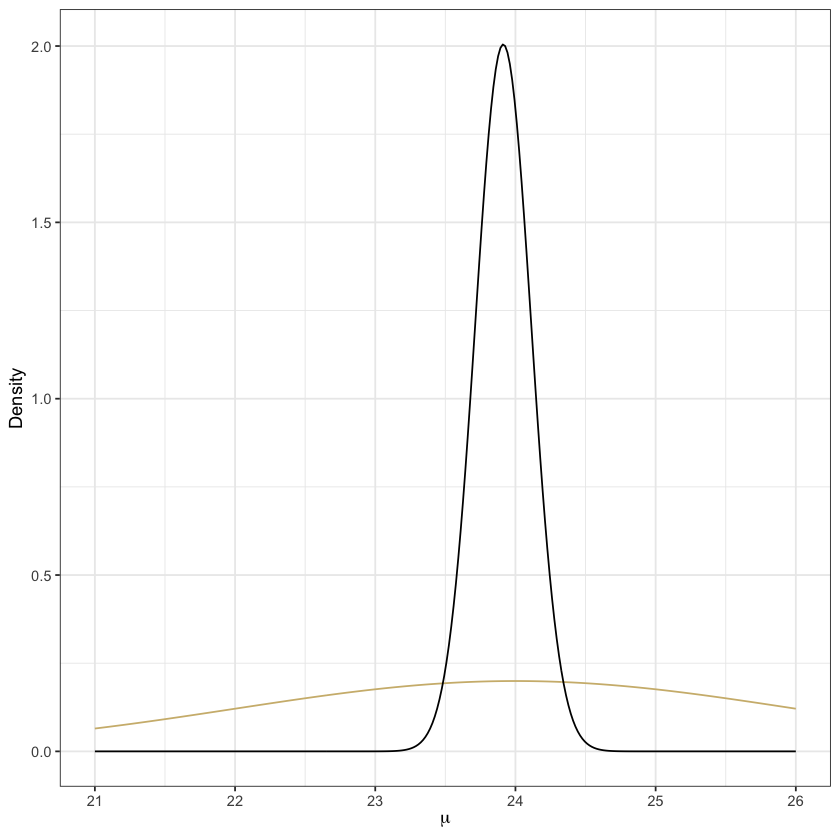

In [12]:
library(ggplot2)
mu_grid = seq(21,26, length.out = 300)

df = data.frame(mu = mu_grid, y_prior = dnorm(mu_grid, theta, tau), 
                y_post = dnorm(mu_grid, post_mu, sqrt(post_sig2)))

ggplot(df) +
    geom_line(aes(x = mu, y = y_prior), col = "#CFB87C") + 
    geom_line(aes(x = mu, y = y_post)) +
    xlab(expression(mu)) +
    ylab("Density") +
    theme_bw()

**B.3(c) [4 points] Compute a $95\%$ credible interval for $\mu$ given the data. Interpret this interval. In particular, do we have evidence to suggest that $\mu = 24$?**

In [13]:
qnorm(c(0.025, 0.975), post_mu, sqrt(post_sig2))

[1] 23.52282 24.30292

**B.3(d) [8 points] Now, suppose instead that prior to the experiment, researchers believed that $\theta = 13$ was the center of the prior distribution, with $\tau^2 = 1$. Compute the posterior distribution for this prior (for the same data as above), reproduce the plots from above, and describe the difference between this posterior and the one from previous parts.**

[1] 23.49231

[1] 0.03846154

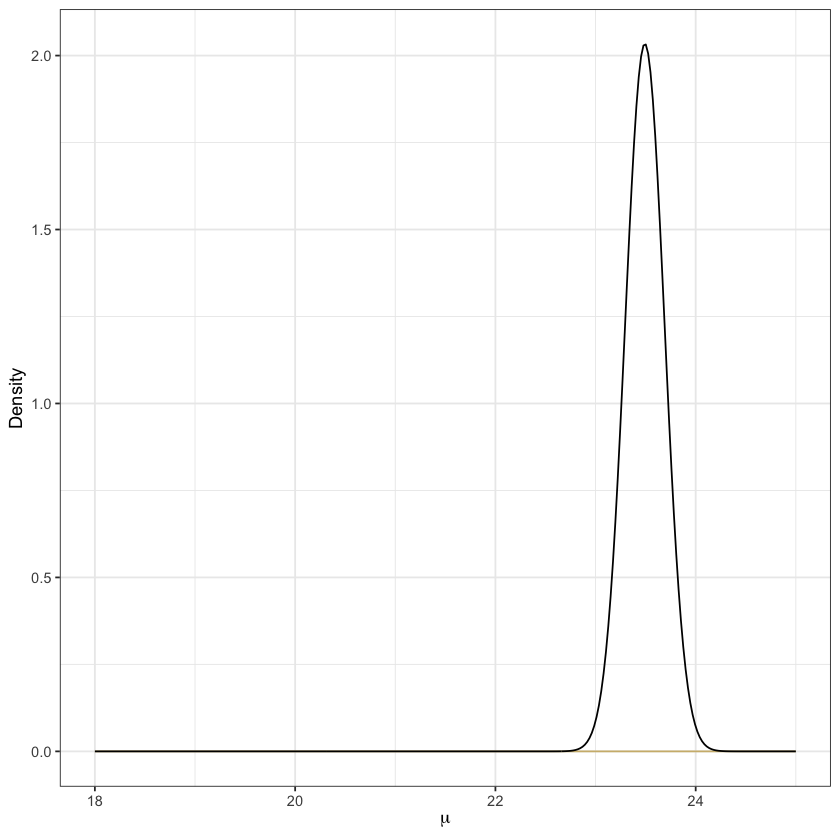

In [29]:
theta = 13; tau = 1; n = 25; sigma = 1
xbar = mean(x)
post_mu = (n*xbar*sigma^(-2) + theta*tau^(-2))/(n*sigma^(-2) + tau^(-2))

post_sig2 = 1/(n/sigma^2 + 1/tau^2)

post_mu; post_sig2

mu_grid = seq(18,25, length.out = 300)

df = data.frame(mu = mu_grid, y_prior = dnorm(mu_grid, theta, tau), 
                y_post = dnorm(mu_grid, post_mu, sqrt(post_sig2)))

ggplot(df) +
    geom_line(aes(x = mu, y = y_prior), col = "#CFB87C") + 
    geom_line(aes(x = mu, y = y_post)) +
    xlab(expression(mu)) +
    ylab("Density") +
    theme_bw()

**B.3(e) [4 points] Compute a credible interval for this new posterior distribution. Interpret this interval. In particular, do we have evidence to suggest that $\mu = 24$?**

In [30]:
qnorm(c(0.025, 0.975), post_mu, sqrt(post_sig2))

[1] 23.10793 23.87669

**B.3(f) [3 points] What might be worrisome about the difference between the credible interval inferences made above? Does Bayesian inference suffer from issues related to [researcher degrees of freedom](https://en.wikipedia.org/wiki/Researcher_degrees_of_freedom)?**

Yes, Bayesian inference can suffer from researcher degrees of freedom, since (even though they aren't supposed to!) researchers can adjust their prior distribution to get a desired posterior result.

In [26]:
1.64*(1/sqrt(5))

[1] 0.7334303